# KNN_SVM_프로모션_효율예측분석
- KNN 결측값 예측에 쓰임
### 쇼핑몰 고객데이터<br> 프로모션 쿠폰발행 후 사용여부 데이터 수집

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
mem=pd.read_csv("./data/member.csv")
tran=pd.read_csv("./data/transaction.csv")

# 1:다의 관계를 가진 테이블은 그 안에서 중복이 일어나므로
# 이렇게 두 파일로 쪼개놓은것.

In [3]:
mem.head(2)

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0


In [4]:
tran.head(2)

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000


In [5]:
mem.columns

Index(['id', 'recency', 'zip_code', 'is_referral', 'channel', 'conversion'], dtype='object')

'id', 'recency'최근방문일, 'zip_code'거주지역, 'is_referral'추천여부, 'channel'접속채널, 'conversion'광고지불한수단을따라서 들어온것인지(광고효과)

In [6]:
tran.columns

Index(['id', 'num_item', 'total_amount'], dtype='object')

'id'고객id, 'num_item'구매수량, 'total_amount'총 구매금액

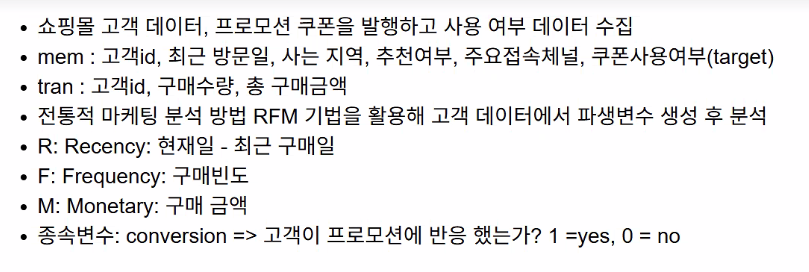

In [7]:
# object에 따라 자동분류해서 한번더 쪼개기 시도중
mem.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [9]:
# dtypes 분리할때 [] 주의할것.
ctg_mem=mem.select_dtypes(include=["object"])
num_mem=mem.select_dtypes(exclude=["object"])
num_mem.describe()


#이상값 (중앙값과 평균 비교)
# 크게 벗어난 건 없다고 보여짐

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


In [14]:
# 특징 파악
num_mem.nunique()

# id는 중복되는것 없음
# recency는 최근 방문일 1~12일까지 있음


id             64000
recency           12
is_referral        2
conversion         2
dtype: int64

In [18]:
num_mem['recency'].unique()

array([10,  6,  7,  9,  2,  1,  5,  4,  3, 11, 12,  8])

In [10]:
ctg_mem.describe(include='all')

,zip_code,channel
count,64000,64000
unique,3,3
top,Surburban,Web
freq,28776,28217


In [19]:
# 결측 확인
mem.isna().sum()

id             0
recency        0
zip_code       0
is_referral    0
channel        0
conversion     0
dtype: int64

In [20]:
# tran의 결측과 이상치확인 , id 중복여부 확인
tran.isna().sum()

id              0
num_item        0
total_amount    0
dtype: int64

In [21]:
# tran은 전체가 int여서 쪼갤필요없음.
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [23]:
# 중복값 있는지 확인
tran.nunique() # 6만4천개의 아이디-전체길이는196836 

id              64000
num_item            6
total_amount       31
dtype: int64

In [26]:
tran.duplicated().sum()

np.int64(1882)

In [22]:
# tran의 이상치도 구하지 않아도 될것.
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


In [ ]:
# [생략] plot을 이용해 대칭여부를 확인
# 이상치 계산도 생략
# 결측치 확인

# 결측값 탐지 0502:09:32

In [ ]:
mem.isna().sum()